In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
excel_path = "Detalle_Precios_SinNulos.xlsx"
df = pd.read_excel(excel_path)


# Eliminar la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,6,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,6,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,3,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,1,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [6]:
valores_nulos=df.isnull().sum()
valores_nulos

,0
CVE_DOC,0
FECHA_DOC,0
NOMBRE_VENDEDOR,0
NOMBRE_CLIENTE,0
CANT,0
CVE_ART,0
DESCR,0
PRECIO_UNITARIO,0
COSTO_UNITARIO,0
COSTO_UNITARIO_CALCULADO,0


In [13]:
# Seleccionar solo las columnas numéricas dentro del rango correcto
columnas_cuantitativas = ['CANT', 'PRECIO_UNITARIO', 'COSTO_UNITARIO',
                          'COSTO_UNITARIO_CALCULADO', 'SUBTOTAL_PARTIDA',
                          'COSTO_TOTAL_CALCULADO', 'MARGEN_UNITARIO_CALCULADO']

cuantitativas = df[columnas_cuantitativas]  # Filtrar solo las columnas numéricas
cualitativas = df.iloc[:, [0]]  # Manteniendo la primera columna como cualitativa


<Figure size 1500x800 with 0 Axes>

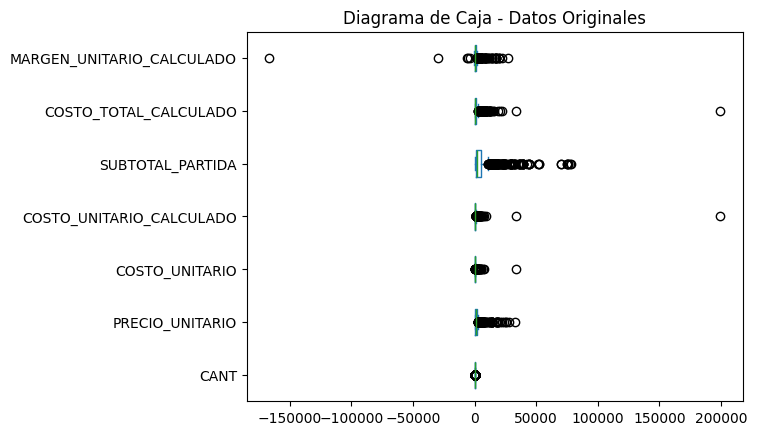

In [14]:
# Visualización inicial de outliers con diagramas de caja
plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Diagrama de Caja - Datos Originales")
plt.show()

# **Procedimiento desviacion estandar para eliminar outliers**

In [15]:
#Encuentro los valores extremos
y=cuantitativas
Limite_Superior=y.mean()+3*y.std()
Limite_Inferior=y.mean()-3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido CANT                            22.531793
PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
dtype: float64
Limite inferior permitido CANT                           -14.324219
PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
dtype: float64


In [16]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data3=cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49


In [17]:
#corroboramos valores nulos del datafrem
valores_nulos=data3.isnull().sum()
valores_nulos

,0
CANT,28
PRECIO_UNITARIO,29
COSTO_UNITARIO,10
COSTO_UNITARIO_CALCULADO,2
SUBTOTAL_PARTIDA,36
COSTO_TOTAL_CALCULADO,5
MARGEN_UNITARIO_CALCULADO,13


In [18]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49


In [19]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

,0
CANT,0
PRECIO_UNITARIO,0
COSTO_UNITARIO,0
COSTO_UNITARIO_CALCULADO,0
SUBTOTAL_PARTIDA,0
COSTO_TOTAL_CALCULADO,0
MARGEN_UNITARIO_CALCULADO,0


# *Procedimiento cuartiles para sustituir valores atipicos*

In [20]:
#metodo aplicando Cuartiles. Encuentro cuartiles 0.25 7 0.75
y=cuantitativas
percentile25=y.quantile(0.25)#q1
percentile75=y.quantile(0.75)#q3
iqr=percentile75-percentile25

Limite_Inferior_iqr=percentile25-(1.5*iqr)
Limite_Superior_iqr=percentile75+(1.5*iqr)
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido CANT                             8.50000
PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
dtype: float64
Limite inferior permitido CANT                           -3.50000
PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
dtype: float64


In [21]:
#Obtenemos datos limpios del Dataframe
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,1.0,NaN,NaN,NaN,5909.84,1884.35,NaN


In [22]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

,0
CANT,169
PRECIO_UNITARIO,127
COSTO_UNITARIO,128
COSTO_UNITARIO_CALCULADO,144
SUBTOTAL_PARTIDA,159
COSTO_TOTAL_CALCULADO,162
MARGEN_UNITARIO_CALCULADO,132


In [23]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,1.0,942.70,108.00,219.90,5909.84,1884.35,684.80


In [24]:
#Unimos el datframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios=pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,CVE_DOC,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,F37034,1.0,434.48,52.80,52.80,434.48,52.80,381.68
1,F37036,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87
2,F37041,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94
3,F37042,1.0,140.00,38.96,38.96,140.00,38.96,101.04
4,F37043,2.0,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...,...
1421,F39834,6.0,712.00,102.31,102.31,4272.00,613.88,609.69
1422,F39834,6.0,718.60,104.69,104.69,4311.60,628.12,613.91
1423,F39835,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,F39837,1.0,942.70,108.00,219.90,5909.84,1884.35,684.80


In [25]:
#Corraboramos los datos nulos
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

,0
CVE_DOC,0
CANT,0
PRECIO_UNITARIO,0
COSTO_UNITARIO,0
COSTO_UNITARIO_CALCULADO,0
SUBTOTAL_PARTIDA,0
COSTO_TOTAL_CALCULADO,0
MARGEN_UNITARIO_CALCULADO,0


In [27]:
#Convertir Dataframe a CSV
Datos_limpios.to_csv("Detalle_Precios_NoAtipicos.csv")